#### Notes

The competition dataset contains text from works of fiction written by spooky authors of the public domain: Edgar Allan Poe, HP Lovecraft and Mary Shelley. The data was prepared by chunking larger texts into sentences using CoreNLP's MaxEnt sentence tokenizer, so you may notice the odd non-sentence here and there. Your objective is to accurately identify the author of the sentences in the test set.

##### File descriptions
`train.csv` - the training set

`test.csv` - the test set

`sample_submission.csv` - a sample submission file in the correct format

##### Data fields
`id` - a unique identifier for each sentence

`text` - some text written by one of the authors

`author` - the author of the sentence (EAP: Edgar Allan Poe, HPL: HP Lovecraft; MWS: Mary Wollstonecraft Shelley)

A reminder about playground competitions: On Kaggle, the spirit of playground competitions is to have fun and learn together. Your score on the leaderboard doesn't earn you points, but you can still make it a rewarding competition for everyone by sharing your code in Kernels and contributing to Discussions (there are prizes for both!). In short, please don't look up the answers.

In [29]:
# Load libraries #

import csv
import json

import numpy
import pandas
from matplotlib import pyplot

In [15]:
# Load all data #

authored_contents = pandas.read_csv("./author detection/train.csv")

unauthored_contents = pandas.read_csv("./author detection/test.csv")

In [3]:
authored_contents.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [16]:
unauthored_contents.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [6]:
authored_contents.shape

(19579, 3)

### Data Exploration

In [7]:
authored_contents.describe()

,id,text,author
count,19579,19579,19579
unique,19579,19579,3
top,id02056,"""He he he"" said the fellow, ""hu hu hu dat you ...",EAP
freq,1,1,7900


In [41]:
training_records = len(authored_contents)

author_eap, author_mws, author_hpl = authored_contents.author.value_counts()

print("Total number of authored contents: ", training_records)
print("Total number of authored contents by EAP: ", author_eap)
print("Total number of authored contents by MWS: ", author_mws)
print("Total number of authored contents by HPL: ", author_hpl)

Total number of authored contents:  19579
Total number of authored contents by EAP:  7900
Total number of authored contents by MWS:  6044
Total number of authored contents by HPL:  5635


In [24]:
# grab text length of each contents

authored_contents['text_length'] = authored_contents['text'].str.len()

In [26]:
authored_contents.head()

,id,text,author,text_length
0,id26305,"This process, however, afforded me no means of...",EAP,231
1,id17569,It never once occurred to me that the fumbling...,HPL,71
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174


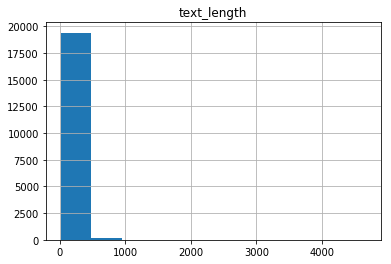

In [30]:
authored_contents.hist()
pyplot.show()

In [35]:
eap = authored_contents[authored_contents['author'] == 'EAP']['text_length']

eap.describe()

count    7900.000000
mean      142.225949
std       105.751334
min        21.000000
25%        68.000000
50%       115.000000
75%       186.000000
max      1533.000000
Name: text_length, dtype: float64

In [39]:
hpl = authored_contents[authored_contents['author'] == 'HPL']['text_length']

hpl.describe()

count    5635.000000
mean      155.843478
std        82.020647
min        21.000000
25%        98.000000
50%       142.000000
75%       196.500000
max       900.000000
Name: text_length, dtype: float64

In [40]:
mws = authored_contents[authored_contents['author'] == 'MWS']['text_length']

mws.describe()

count    6044.000000
mean      151.659828
std       126.305008
min        21.000000
25%        84.000000
50%       130.000000
75%       192.000000
max      4663.000000
Name: text_length, dtype: float64

In [42]:
# examine the same in test data

testing_records = len(unauthored_contents)

unauthored_contents['text_length'] = unauthored_contents['text'].str.len()

In [43]:
unauthored_contents.head()

,id,text,text_length
0,id02310,"Still, as I urged our leaving Ireland with suc...",110
1,id24541,"If a fire wanted fanning, it could readily be ...",330
2,id00134,And when they had broken down the frail door t...,189
3,id27757,While I was thinking how I should possibly man...,223
4,id04081,I am not sure to what limit his knowledge may ...,53


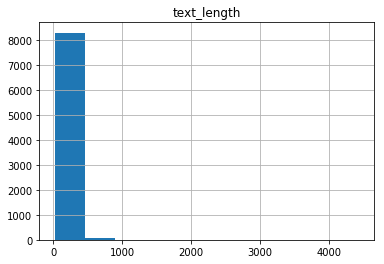

In [44]:
unauthored_contents.hist()
pyplot.show()

In [46]:
# binarize author in the training data

authored_contents['numerical_author'] = authored_contents.author.map({ 'EAP': 0, 'HPL': 1, 'MWS': 2 })

In [48]:
authored_contents.head()

,id,text,author,text_length,numerical_author
0,id26305,"This process, however, afforded me no means of...",EAP,231,0
1,id17569,It never once occurred to me that the fumbling...,HPL,71,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174,1


In [49]:
# Define labels and features set

X = authored_contents['text']
Y = authored_contents['numerical_author']

In [51]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = Y)

In [59]:
# Show the results of the split

# Features
print("Training set has # features: ", X_train.shape[0])
print("Testing set has # features: ", X_test.shape[0])

# Labels
print("Training set has # labels: ", Y_train.shape[0])
print("Testing set has # labels: ", Y_test.shape[0])

Training set has # features:  15663
Testing set has # features:  3916
Training set has # labels:  15663
Testing set has # labels:  3916


In [63]:
print(Y_train.value_counts())

print(Y_test.value_counts())

0    6320
2    4835
1    4508
Name: numerical_author, dtype: int64
0    1580
2    1209
1    1127
Name: numerical_author, dtype: int64


In [65]:
# operate the data with CountVectorizer and 
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
vectorizer.fit(X_train)

training_vectorizer = vectorizer.transform(X_train)

In [66]:
print(len(vectorizer.get_feature_names()))

22922


In [73]:
# run vectorizer for X_test

testing_vectorizer = vectorizer.transform(X_test)

In [74]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()